In [2]:
from data_process import loadAndProcessData
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# EXPLORATION OF FULL DATASET


In [3]:
## UPLOAD THE FILE
datafull = pd.read_csv("data/US_Accidents_Dec19.csv")
print(f'original shape: {datafull.shape}')

original shape: (2974335, 49)


In [4]:
## DISTRIBUTION OF LABELS
datafull['Severity'].unique()
datafull.groupby('Severity').count()['ID'] 

#set(data['Severity'].values)

Severity
1        968
2    1993410
3     887620
4      92337
Name: ID, dtype: int64

In [5]:
## REMOVE COLUMNS WITHOUT PREDICTIVE POWER OR REPEATED MEANING
COLUMNS_TO_KEEP = [
    'ID'
    ,'Severity'
    ,'Start_Time'
    ,'End_Time'
    ,'Start_Lat'
    ,'Start_Lng'
    ,'Distance(mi)'
    ,'Side'
    #,'City'
    #,'County'
    ,'State'
    ,'Temperature(F)'
    ,'Humidity(%)'
    ,'Pressure(in)'
    ,'Visibility(mi)'
    ,'Wind_Direction'
    ,'Wind_Speed(mph)'
    ,'Weather_Condition'
    ,'Amenity'
    ,'Bump'
    ,'Crossing'
    ,'Give_Way'
    ,'Junction'
    ,'No_Exit'
    ,'Railway'
    ,'Roundabout'
    ,'Station'
    ,'Stop'
    ,'Traffic_Calming'
    ,'Traffic_Signal'
    ,'Turning_Loop'
    ,'Sunrise_Sunset'
]

#filter on the columns
datafull_lite = datafull[COLUMNS_TO_KEEP]



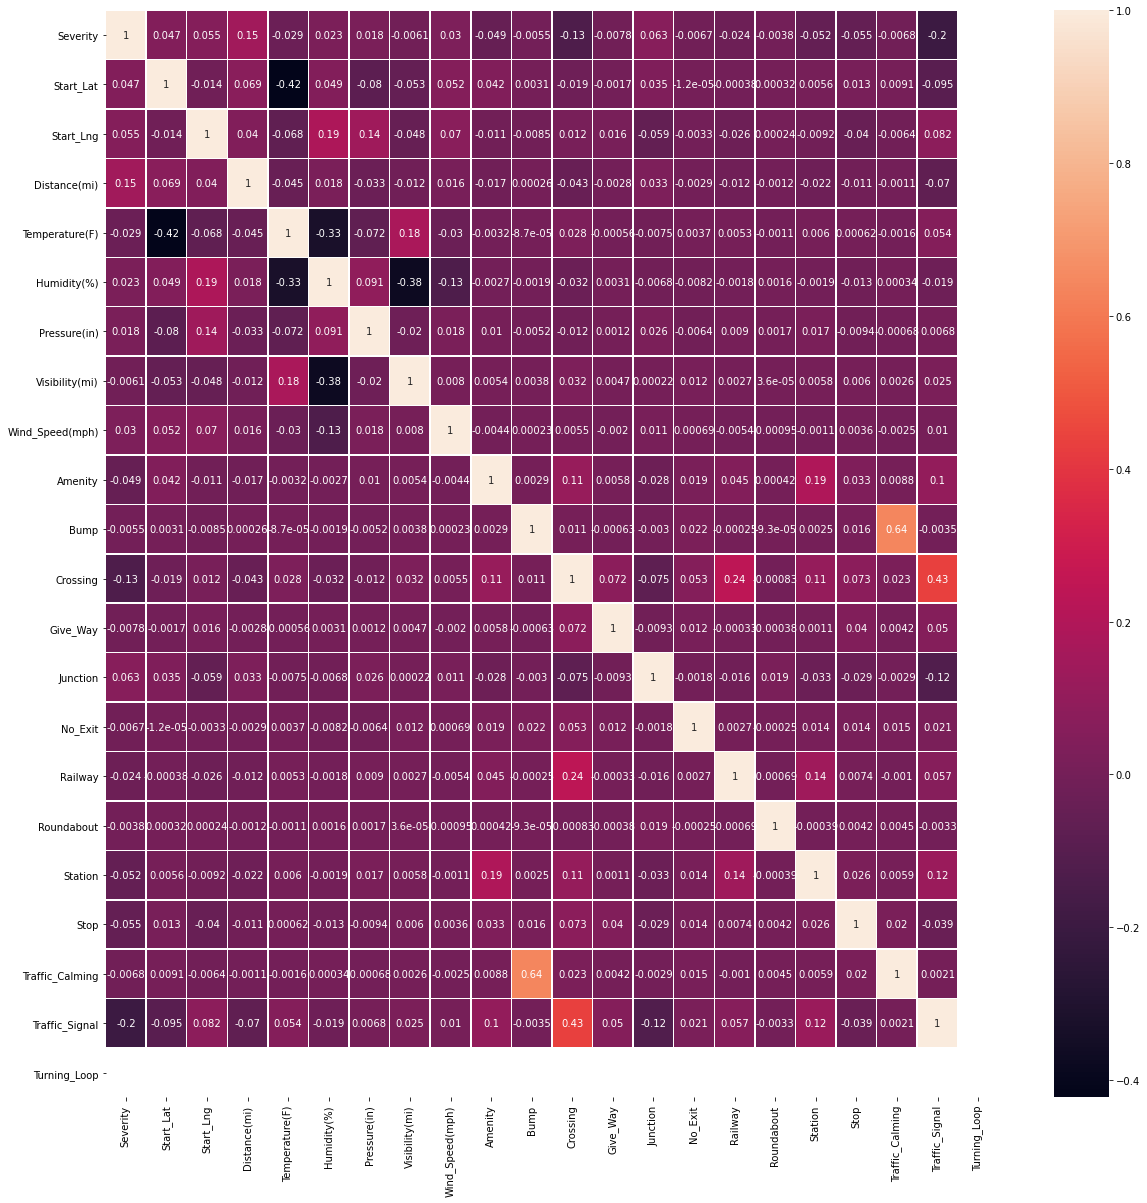

In [6]:
## CORRELATION CHECK  - before dummies


fig, ax = plt.subplots(figsize=(20,20)) # Sample figsize in inches

Var_Corr = datafull_lite.corr()  #data.iloc[:,1:].corr()
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, ax=ax,linewidths=.5)   

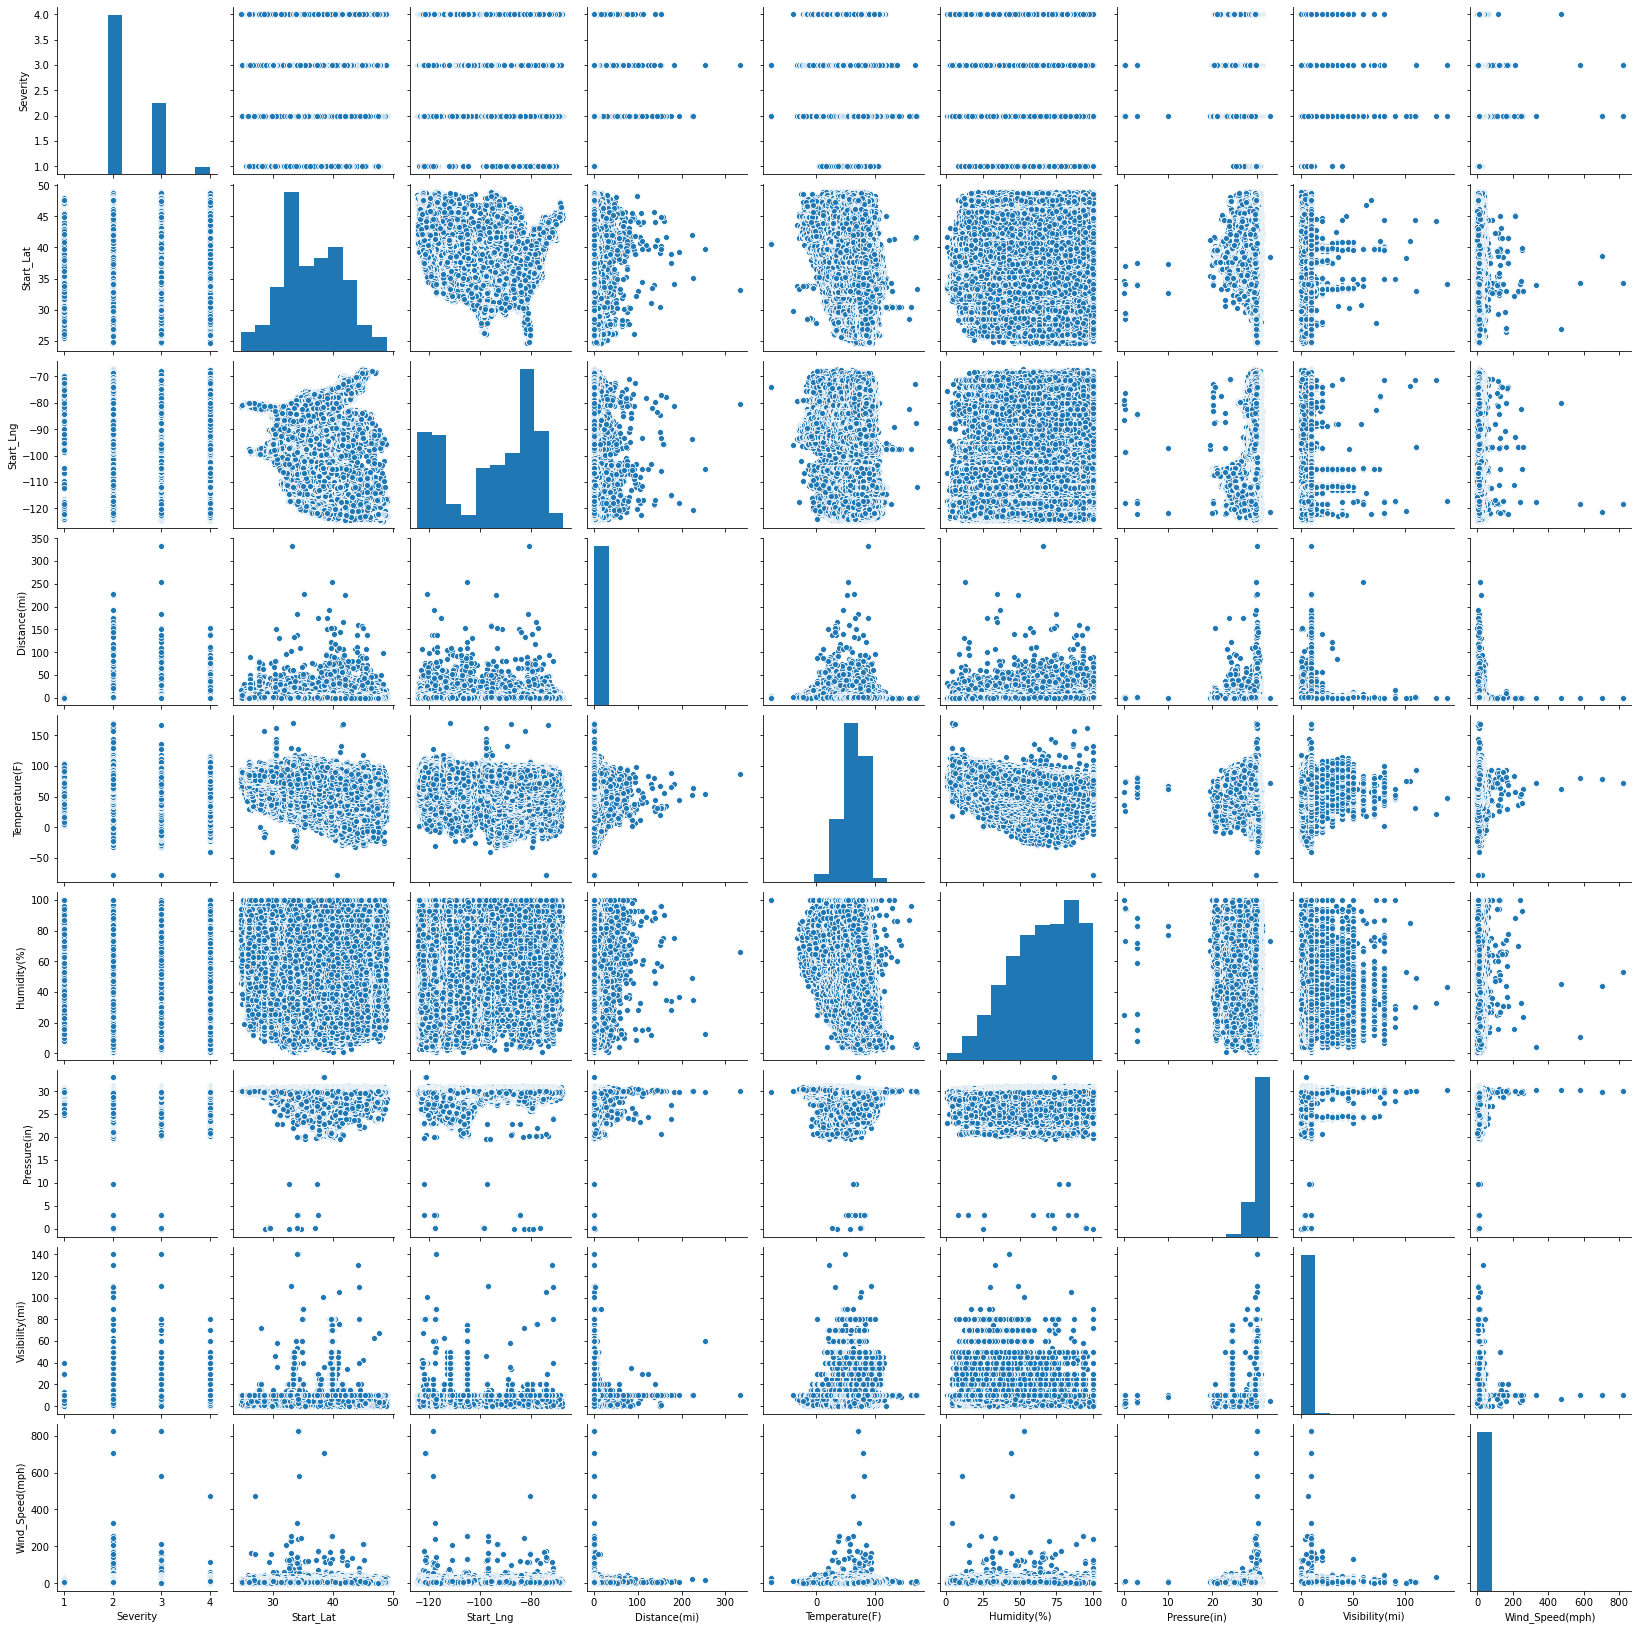

In [20]:
## PLOT PAIRWISE CONTINUOUS FEATURES
FLOAT_COLUMNS = [
    'Severity'
    ,'Start_Lat'
    ,'Start_Lng'
    ,'Distance(mi)'    
    ,'Temperature(F)'
    ,'Humidity(%)'
    ,'Pressure(in)'
    ,'Visibility(mi)'
    ,'Wind_Speed(mph)'
]


subset = datafull_lite.loc[:, FLOAT_COLUMNS]

## note: takes some time to plot
sns.pairplot(subset)

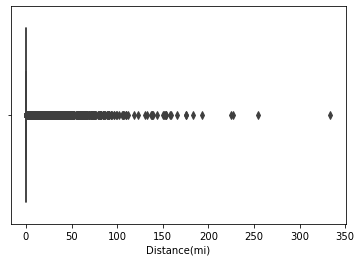

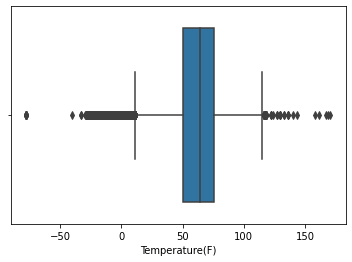

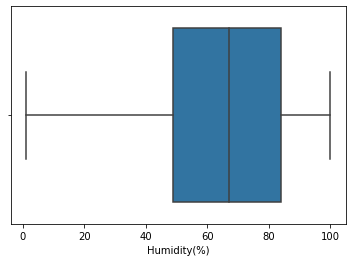

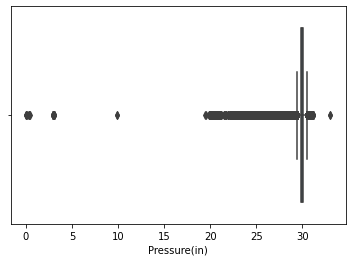

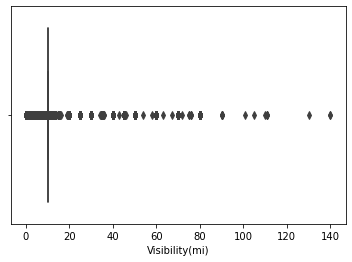

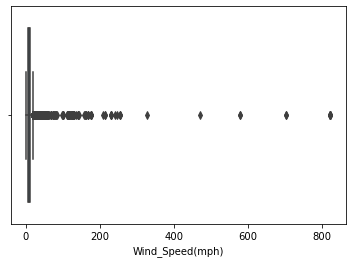

In [30]:
## OUTLIERS CHECK ON CONTINUOUS FEATURES (removed Lat Long)
FLOAT_COLUMNS = [

    'Distance(mi)'    
    ,'Temperature(F)'
    ,'Humidity(%)'
    ,'Pressure(in)'
    ,'Visibility(mi)'
    ,'Wind_Speed(mph)'
]

    
for g in FLOAT_COLUMNS:
    
    fig, ax= plt.subplots(1, 1, figsize=(6, 4))
    ax = sns.boxplot(x=datafull_lite[g])   
    plt.show()

# CREATE BALANCED SAMPLED DATASET

In [7]:
## RUN SCRIPT FOR BALANCED SAMPLING

%run sampling.py


original shape: (2974335, 49)
Severity
1        968
2    1993410
3     887620
4      92337
Name: ID, dtype: int64
after drop NA shape: (2506618, 30)
Severity
1        804
2    1691223
3     739481
4      75110
Name: ID, dtype: int64
new shape: (3216, 30)
excel file created


# EXPLORE CORRELATION ON SAMPLED DATASET

original shape: (10000, 30)
Correlation plot for sampled dataset
AxesSubplot(0.125,0.125;0.62x0.755)
final shape: (3000, 144)


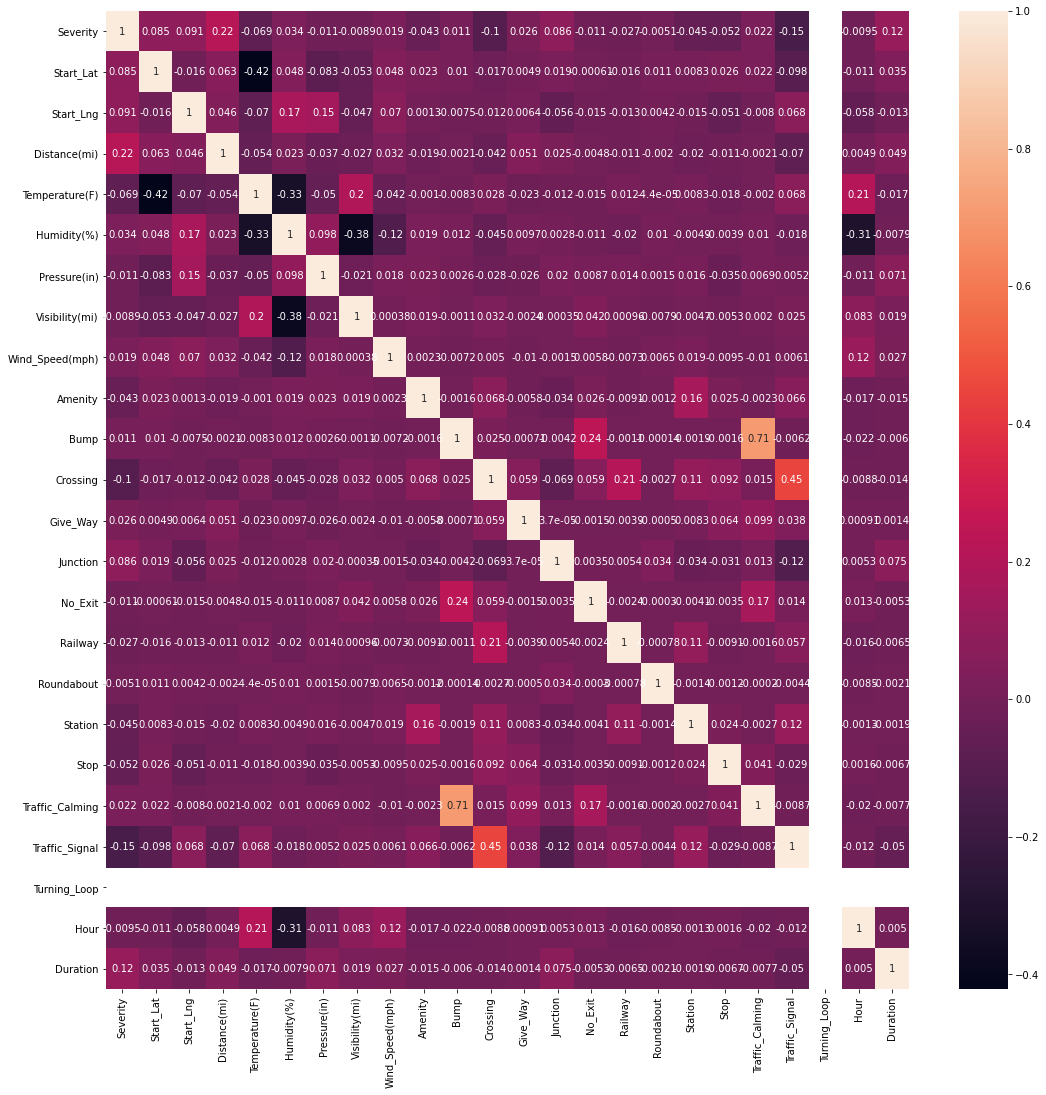

In [3]:
## RUN SCRIPT ON SAMPLED DATASET
data, cols = loadAndProcessData('data/US_Accidents_Dec19_LITE_10000.csv', sampleSize = 3000)

## NOTE: within this samples, we don't have predictive power with Bump and Roundabout either.

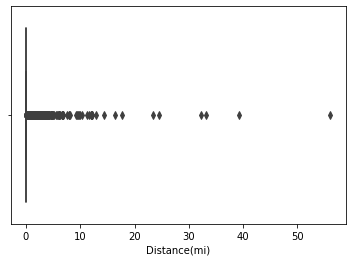

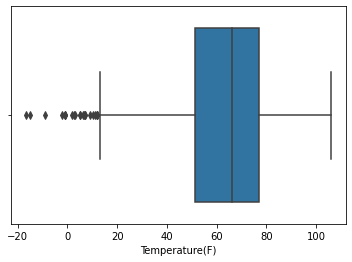

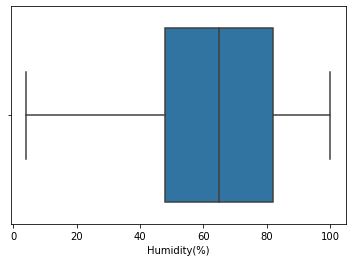

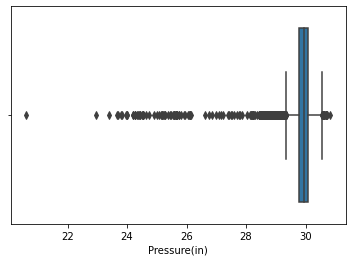

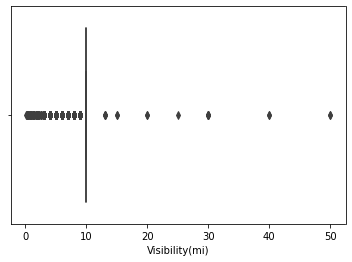

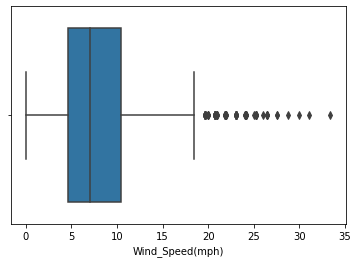

In [4]:
## OUTLIERS CHECK ON CONTINUOUS FEATURES (removed Lat Long)
FLOAT_COLUMNS = [

    'Distance(mi)'    
    ,'Temperature(F)'
    ,'Humidity(%)'
    ,'Pressure(in)'
    ,'Visibility(mi)'
    ,'Wind_Speed(mph)'
]

    
for g in FLOAT_COLUMNS:
    
    fig, ax= plt.subplots(1, 1, figsize=(6, 4))
    ax = sns.boxplot(x=data[g])   
    plt.show()